In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [3]:
data = pd.read_csv(r"D:\assignment qns\PCA\wine.csv")
data.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

In [5]:
data.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [6]:
data.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [7]:
data.describe()

Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.124453         0.572359    2.318286   
min      0.980000    0.340000       0.130000         0.410000    1.280000   
25%      1.742500    1.205000       0.270000         1.250000    3.220000   
50%      2.355000    2.135000       0.340000         1.555000    4.690000   
75%      2.800000    2.875000       0.437500         1.950000    6.200000   
max      3.880000    5.080000       0.660000         3.580000   13.000000   

              Hue    Dilution      Proline  
count  178.000000  178.000000   178.000000  
mean     0.957449    2.611685   746.893258  
std      0.228572    0.709990   314.907474  
min      0.480000    1.270000   278.000000  
25%      0.782500    1.937500   500.500000  
50%      0.965000    2.780000   673.500000  
75%      1.120000    3.170000   985.000000  
max      1.710000    4.000000  1680.000000

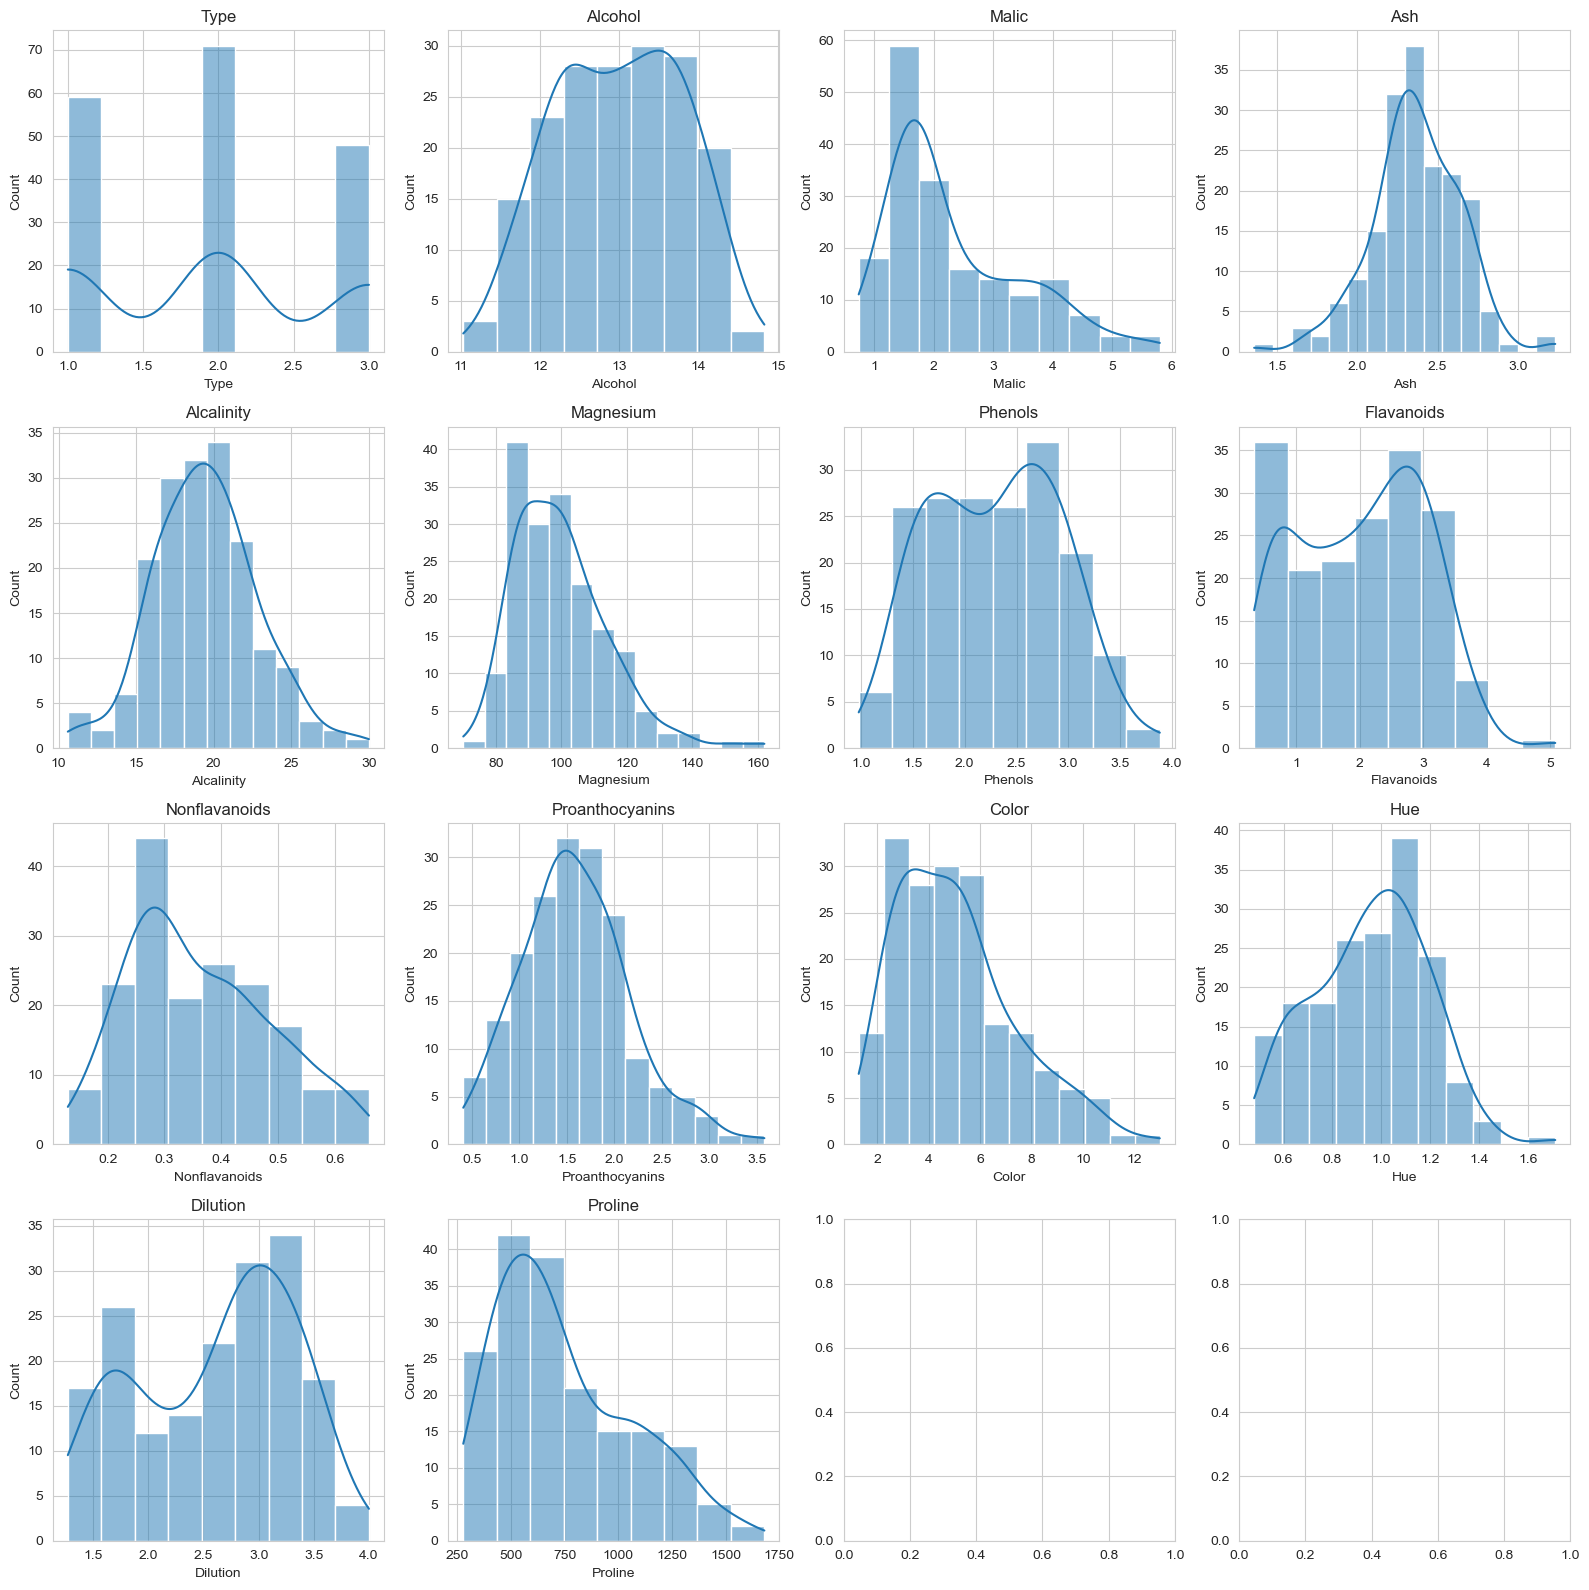

In [11]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Create subplots for each feature
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot histograms for each feature
for i, col in enumerate(data.columns):
    sns.histplot(data[col], ax=axes[i], kde=True)
    axes[i].set_title(col)

# Adjust layout
plt.tight_layout()
plt.show()

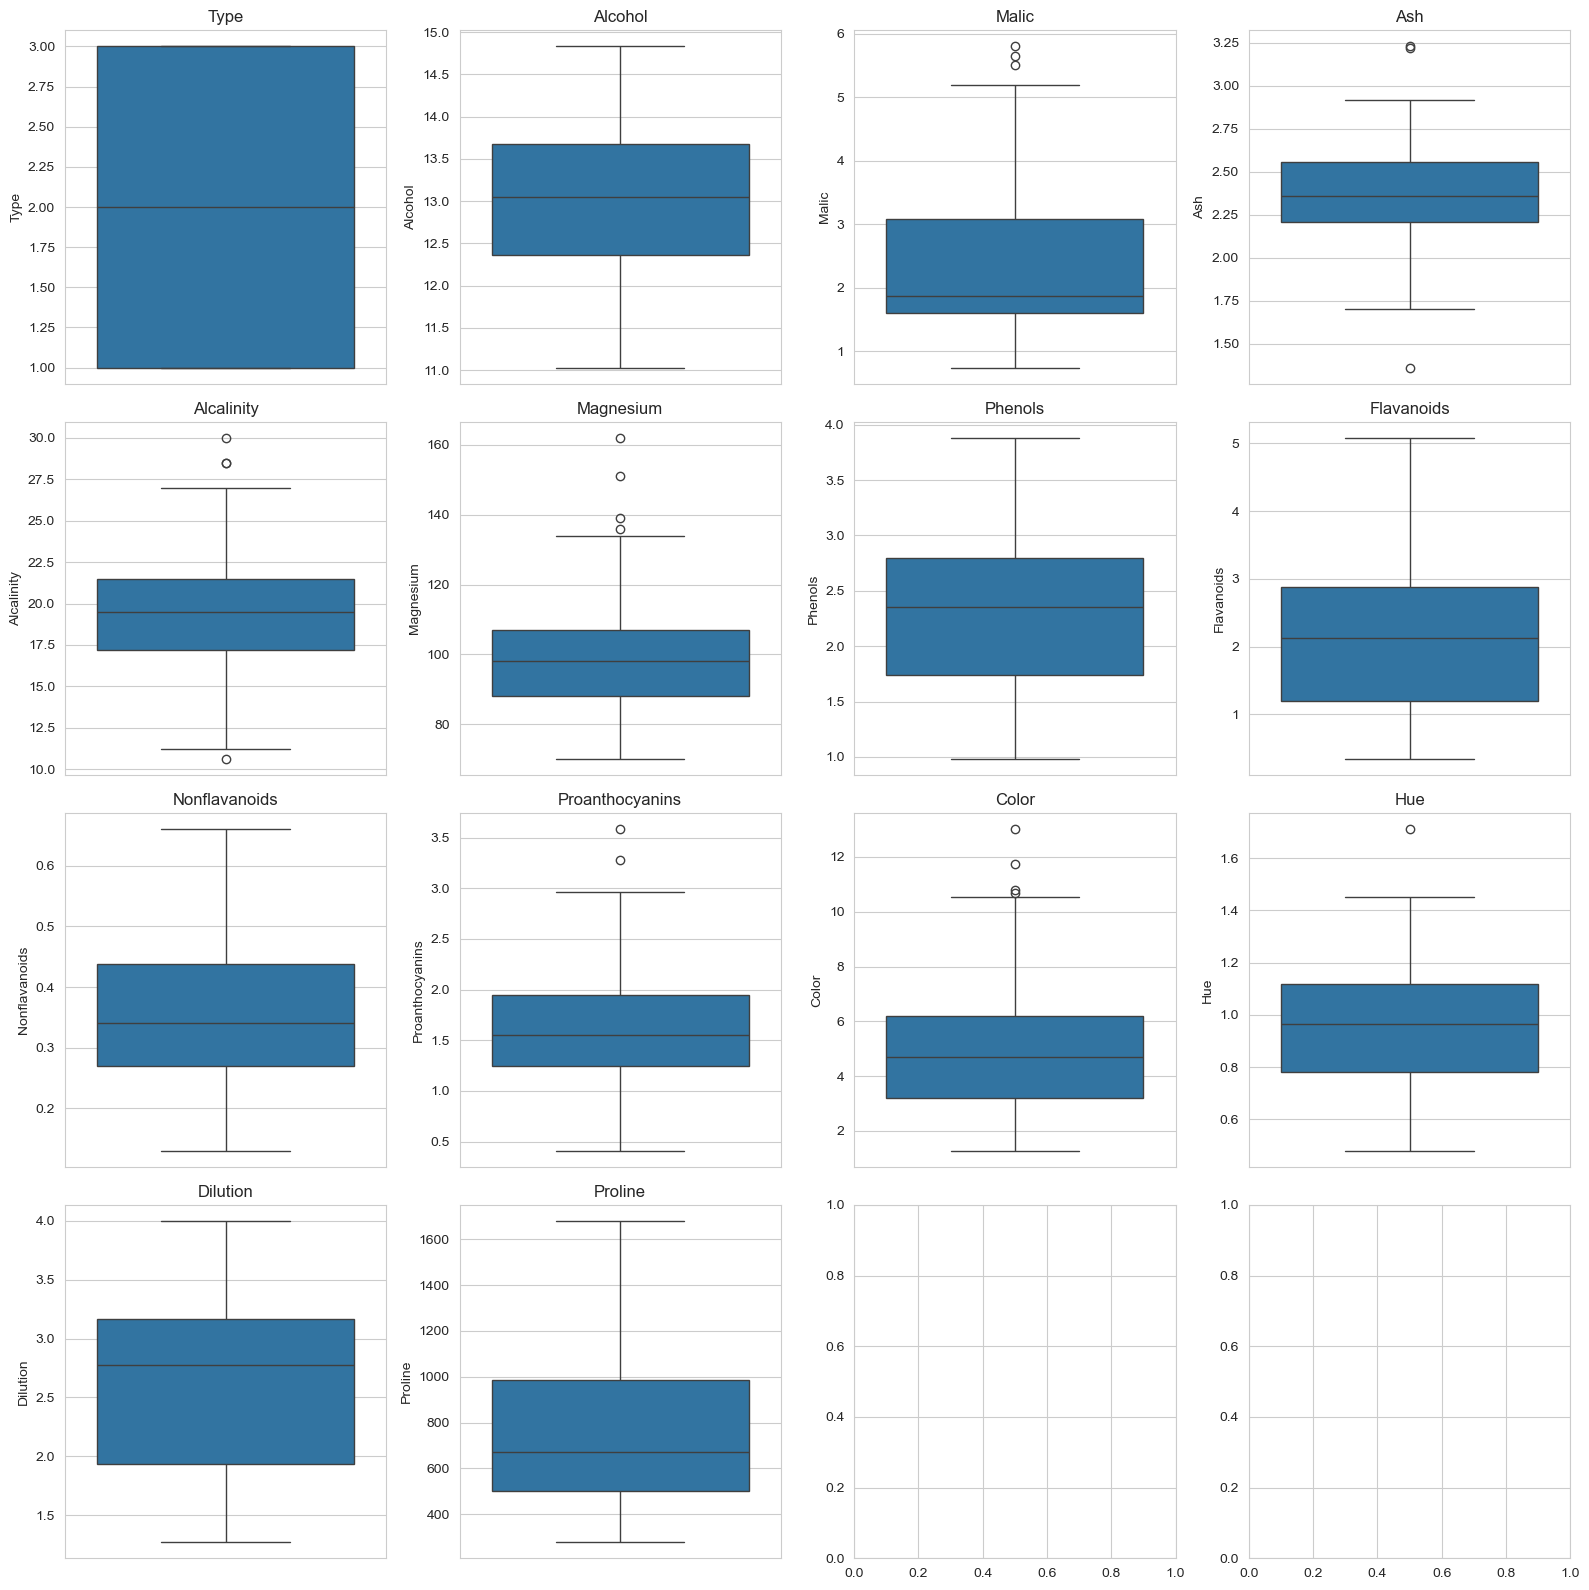

In [12]:
# Create box plots for each feature
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot box plots for each feature
for i, col in enumerate(data.columns):
    sns.boxplot(data[col], ax=axes[i])
    axes[i].set_title(col)

# Adjust layout
plt.tight_layout()
plt.show()

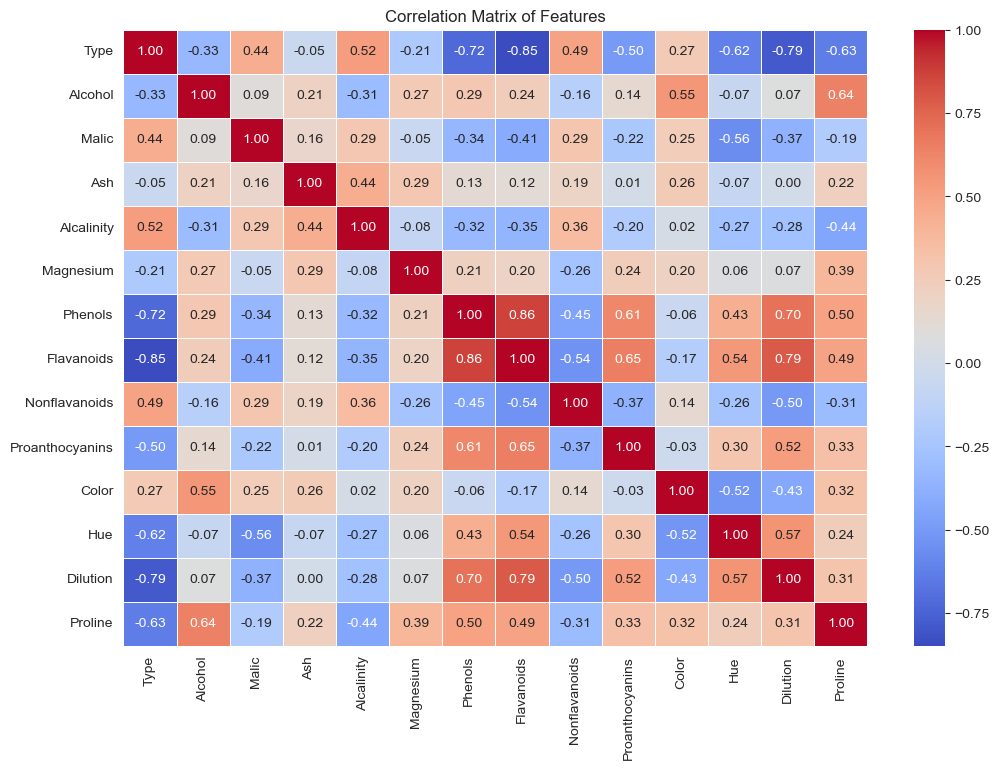

In [13]:
# Calculate correlation matrix
correlation_matrix = data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()

In [15]:
# Separate features (X) and target variable (y), 
X = data.drop(columns=['Type']) 
y = data['Type'] 

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_components = 2  # Example: reduce to 2 components

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

In [17]:
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.36198848 0.1920749 ]


In [23]:
# Create a DataFrame for the reduced dataset
columns = [f"PC{i+1}" for i in range(n_components)]
X_pca_df = pd.DataFrame(data=X_pca, columns=columns)
print("Reduced dataset after PCA:")
print(X_pca_df.head())

Reduced dataset after PCA:
        PC1       PC2
0  3.316751 -1.443463
1  2.209465  0.333393
2  2.516740 -1.031151
3  3.757066 -2.756372
4  1.008908 -0.869831


In [25]:
pca = PCA()
# Fit PCA on standardized data
pca.fit(X_scaled)

PCA()

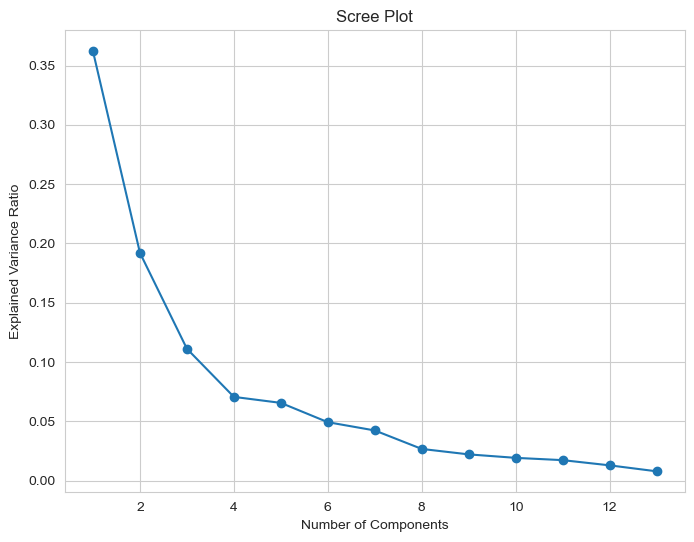

In [28]:
# Scree plot: Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

In [29]:
# Cumulative explained variance: Plot cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

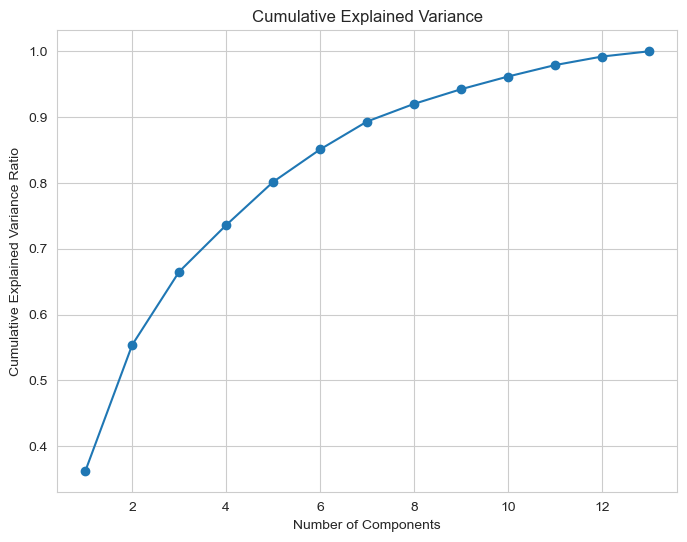

In [31]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [32]:
# Transform the original dataset into principal components
X_principal_components = pca.transform(X_scaled)

In [33]:
# Create a DataFrame for the principal components
principal_components_df = pd.DataFrame(data=X_principal_components, columns=[f"PC{i+1}" for i in range(X_principal_components.shape[1])])

In [34]:
# Print the principal components DataFrame
print("Principal Components:")
print(principal_components_df.head())

Principal Components:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.316751 -1.443463 -0.165739 -0.215631  0.693043 -0.223880  0.596427   
1  2.209465  0.333393 -2.026457 -0.291358 -0.257655 -0.927120  0.053776   
2  2.516740 -1.031151  0.982819  0.724902 -0.251033  0.549276  0.424205   
3  3.757066 -2.756372 -0.176192  0.567983 -0.311842  0.114431 -0.383337   
4  1.008908 -0.869831  2.026688 -0.409766  0.298458 -0.406520  0.444074   

        PC8       PC9      PC10      PC11      PC12      PC13  
0  0.065139  0.641443  1.020956 -0.451563  0.540810 -0.066239  
1  1.024416 -0.308847  0.159701 -0.142657  0.388238  0.003637  
2 -0.344216 -1.177834  0.113361 -0.286673  0.000584  0.021717  
3  0.643593  0.052544  0.239413  0.759584 -0.242020 -0.369484  
4  0.416700  0.326819 -0.078366 -0.525945 -0.216664 -0.079364  


In [40]:
from sklearn.cluster import KMeans
import os

# Initialize KMeans with the number of clusters you want to identify
n_clusters = 3  # Example: 3 clusters
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)

In [43]:
# Fit KMeans to the original dataset (X)
kmeans.fit(X)

C:\Users\RAHUL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=10, random_state=42)

In [44]:
# Get the cluster labels assigned to each data point
cluster_labels = kmeans.labels_

In [45]:

# Print the cluster labels
print("Cluster Labels:")
print(cluster_labels)

Cluster Labels:
[1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1 1 1 1 1 1 2 2
 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 0 2 0 0 2 2 2 0 0 1
 2 0 0 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 0 2 2 0 2 0 2 0 0 0 2 0 0 0 0 2 0
 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 2 2 2 0 0 0 2 2 0 0 2 2 0 2
 2 0 0 0 0 2 2 2 0 2 2 2 0 2 0 2 2 0 2 2 2 2 0 0 2 2 2 2 2 0]


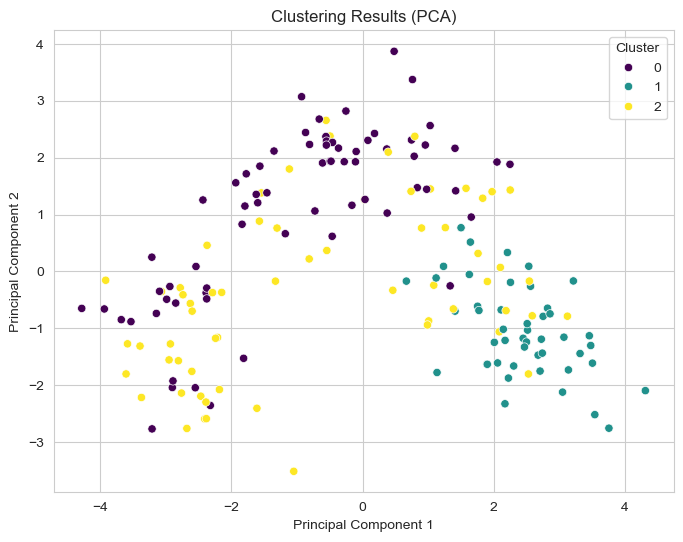

In [47]:
# Scatter plot (for two-dimensional data or reduced dimensions)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_principal_components[:, 0], y=X_principal_components[:, 1], hue=cluster_labels, palette="viridis")
plt.title("Clustering Results (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

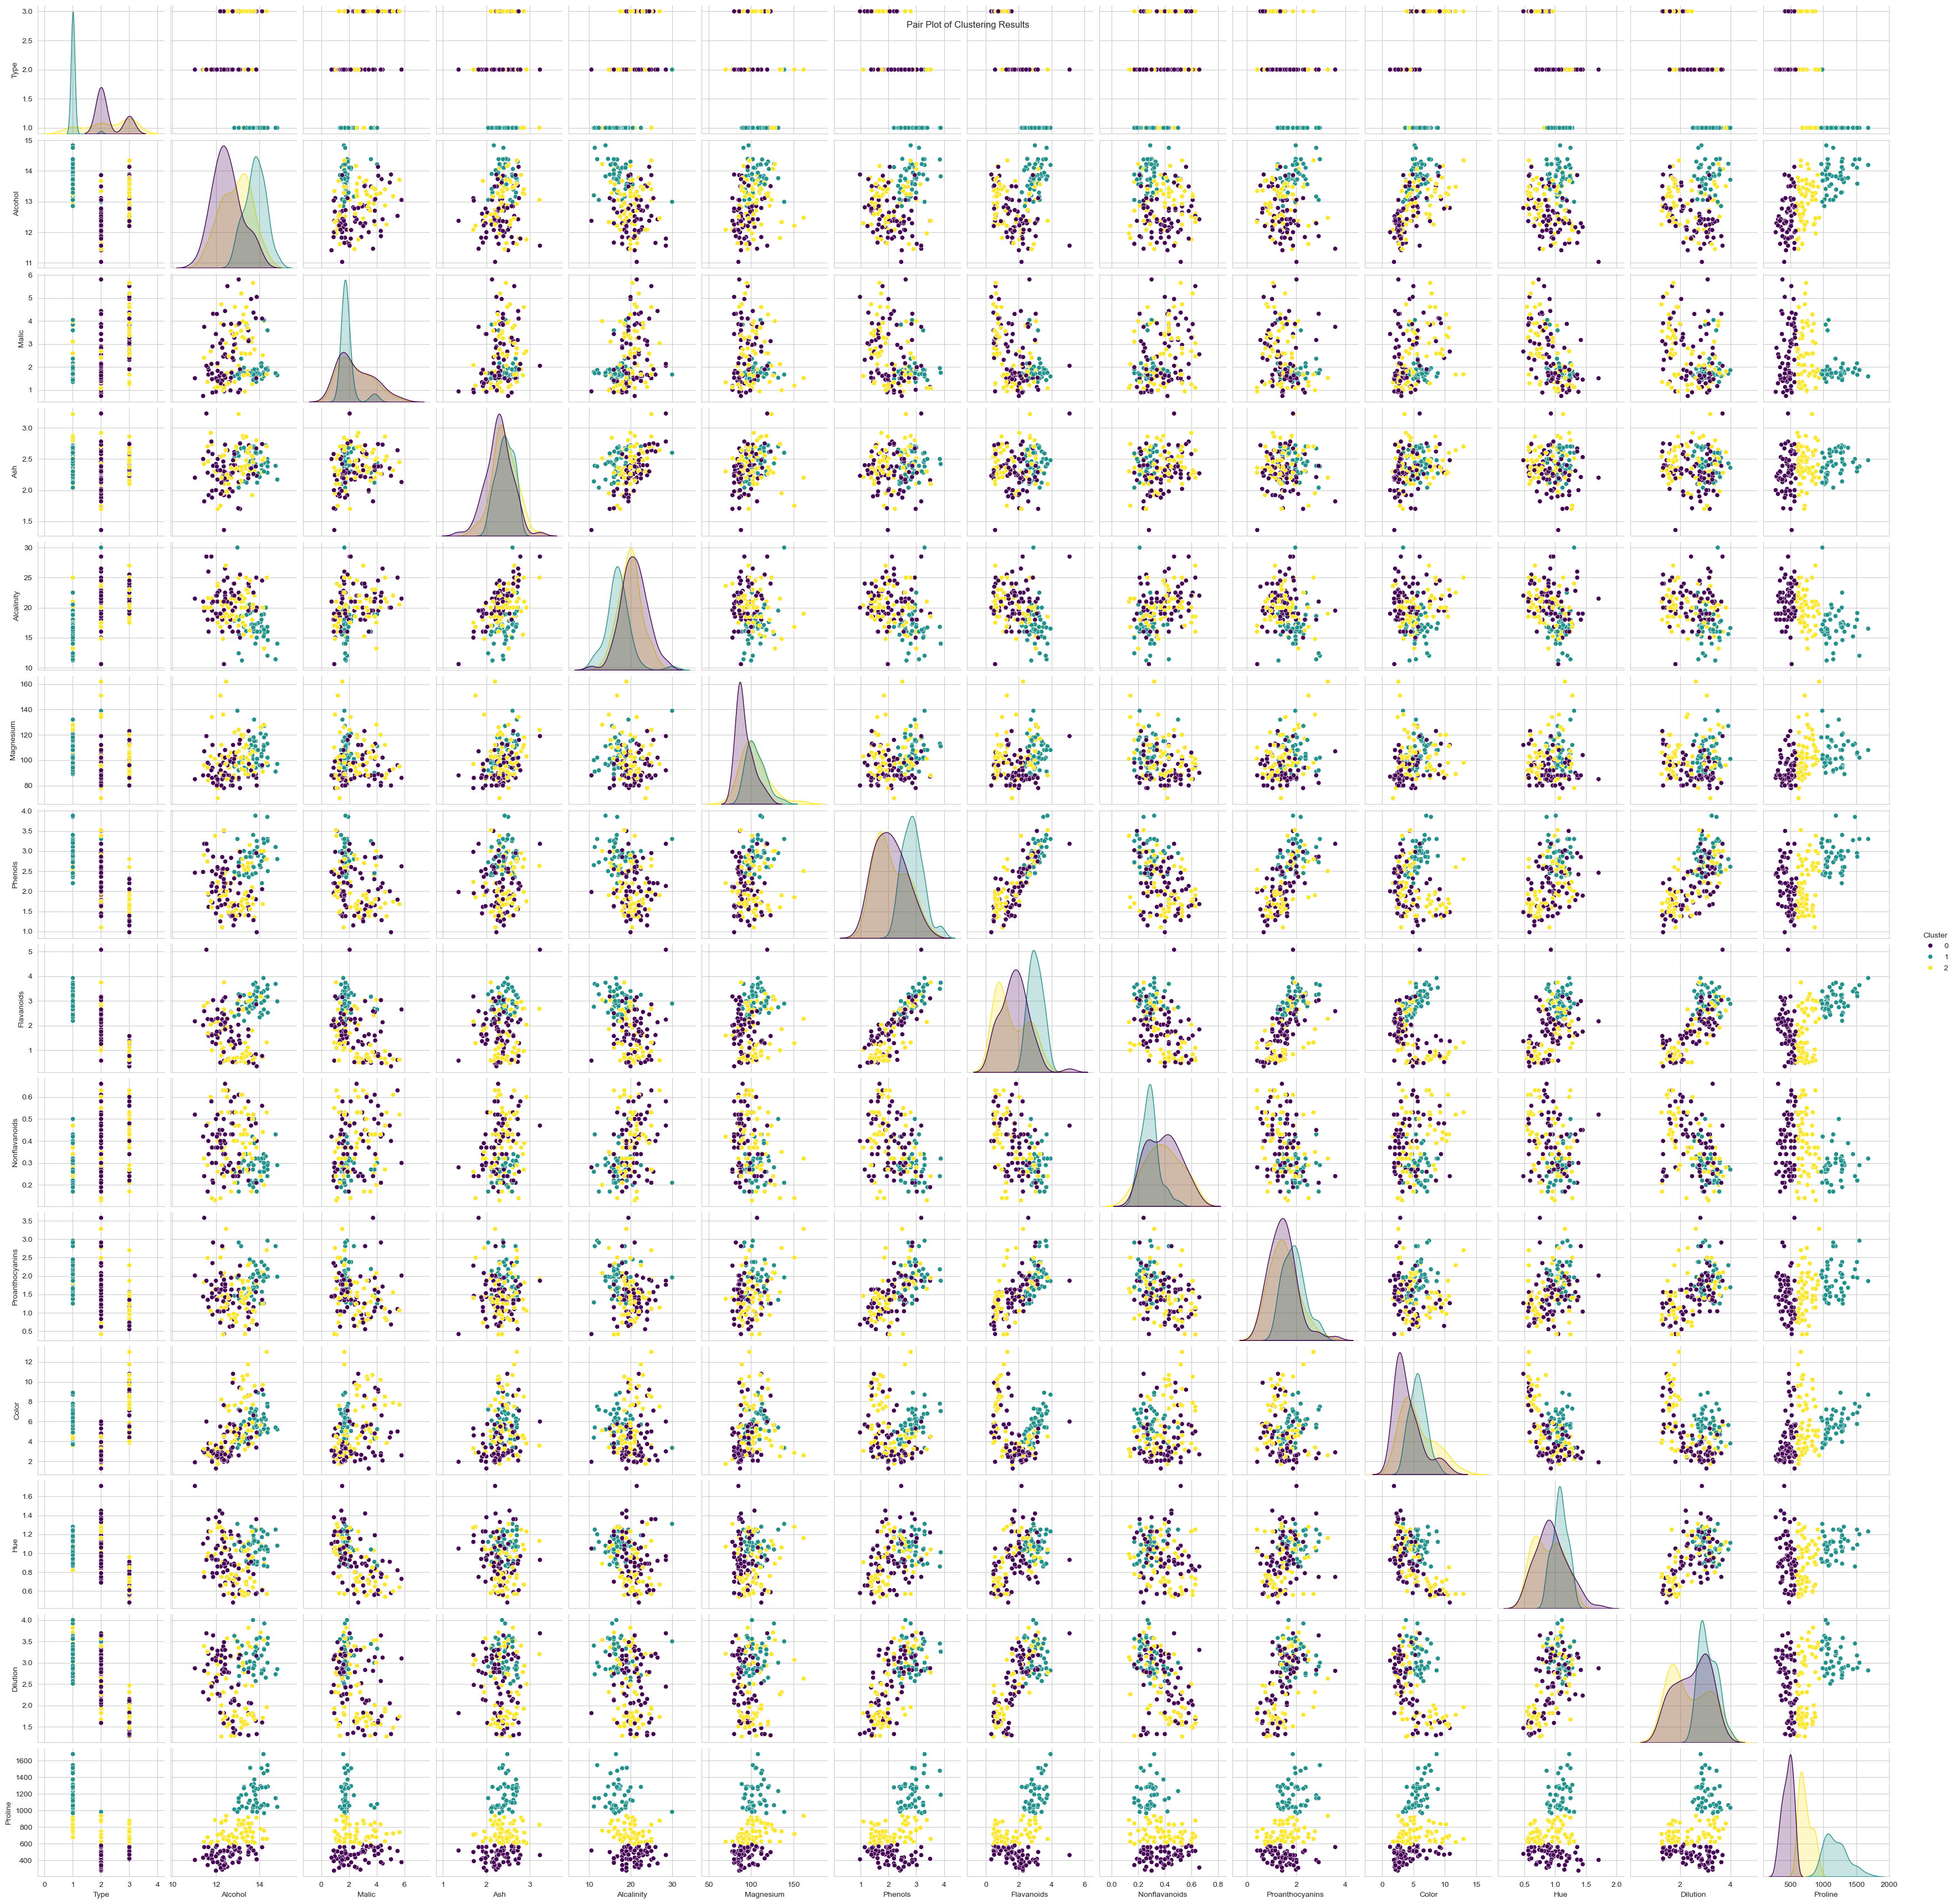

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add cluster labels to the original dataset
data_with_clusters = data.copy()  # Create a copy of the original dataset
data_with_clusters['Cluster'] = cluster_labels  # Add cluster labels

# Pair plot
sns.pairplot(data_with_clusters, hue="Cluster", palette="viridis")
plt.suptitle("Pair Plot of Clustering Results")
plt.show()

In [51]:

# Cluster centroids plot (for low-dimensional data)
if X.shape[1] <= 3:  # Check if the original data has three or fewer dimensions
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=cluster_labels, palette="viridis")
    sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], marker='X', s=200, color='red', label='Centroids')
    plt.title("Clustering Results with Centroids")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend(title="Cluster")
    plt.show()
else:
    print("Original data has more than three dimensions. Unable to visualize cluster centroids.")

Original data has more than three dimensions. Unable to visualize cluster centroids.


In [52]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Evaluate clustering performance using silhouette score
silhouette = silhouette_score(X_scaled, cluster_labels)
print("Silhouette Score:", silhouette)

# Evaluate clustering performance using Davies–Bouldin index
davies_bouldin = davies_bouldin_score(X_scaled, cluster_labels)
print("Davies–Bouldin Index:", davies_bouldin)

Silhouette Score: 0.1080137021776675
Davies–Bouldin Index: 3.3640139569058207


#### K-means clustering to the PCA-transformed dataset and visualize the clustering results.

C:\Users\RAHUL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\RAHUL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


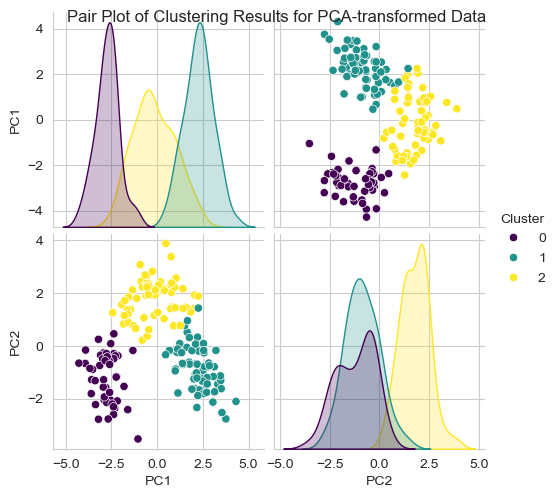

In [54]:
from sklearn.cluster import KMeans

# Apply K-means clustering to the PCA-transformed dataset
kmeans_pca = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_pca.fit(X_pca)
cluster_labels_pca = kmeans_pca.labels_

# Visualize clustering results using pair plot for PCA-transformed data
# Create DataFrame for PCA-transformed data
pc_df_pca = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(n_components)])

# Add cluster labels to the PCA-transformed DataFrame
pc_df_pca['Cluster'] = cluster_labels_pca

# Pair plot
sns.pairplot(pc_df_pca, hue="Cluster", palette="viridis")
plt.suptitle("Pair Plot of Clustering Results for PCA-transformed Data")
plt.show()

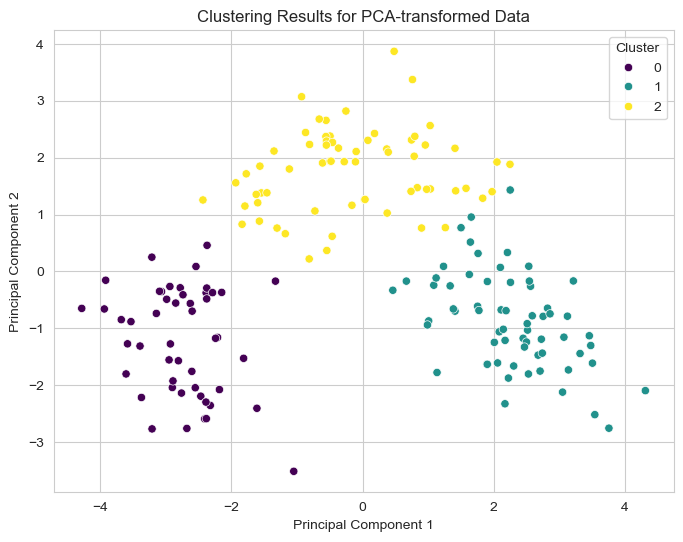

In [55]:
import matplotlib.pyplot as plt

# Visualize clustering results for PCA-transformed data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels_pca, palette="viridis", legend="full")
plt.title("Clustering Results for PCA-transformed Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

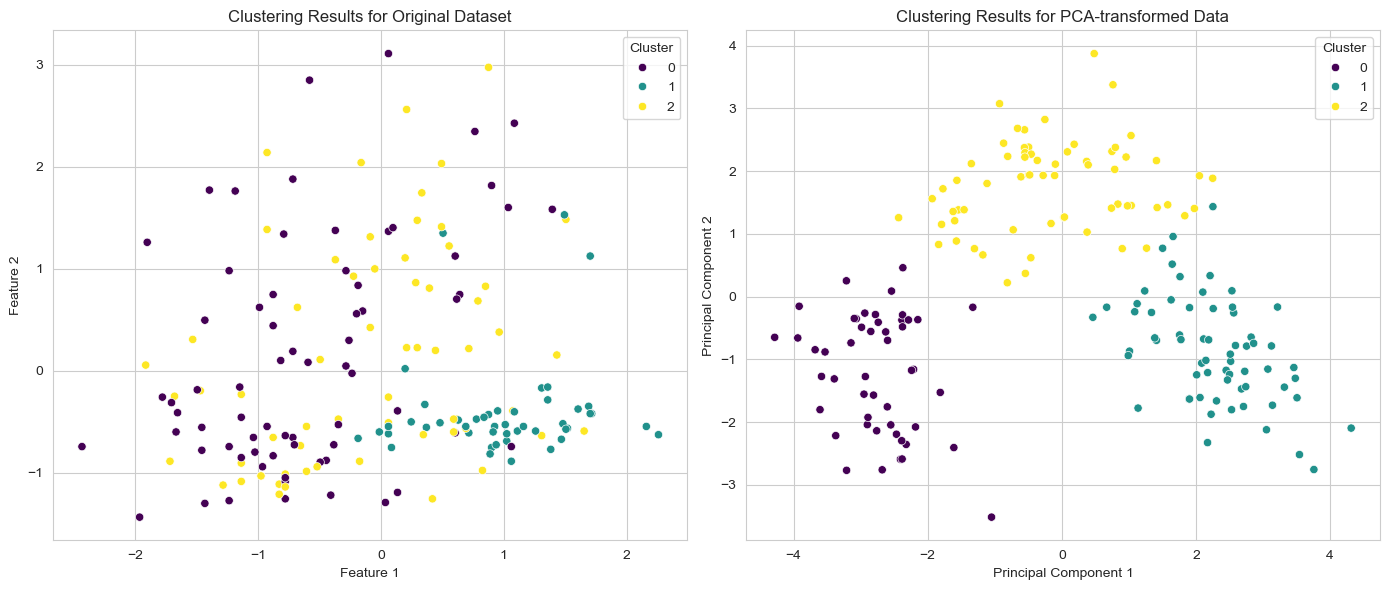

In [57]:
# Create subplots for both clustering results
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Visualize clustering results for original dataset
sns.scatterplot(ax=axes[0], x=X_scaled[:, 0], y=X_scaled[:, 1], hue=cluster_labels, palette="viridis", legend="full")
axes[0].set_title("Clustering Results for Original Dataset")
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")
axes[0].legend(title="Cluster")

# Visualize clustering results for PCA-transformed data
sns.scatterplot(ax=axes[1], x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels_pca, palette="viridis", legend="full")
axes[1].set_title("Clustering Results for PCA-transformed Data")
axes[1].set_xlabel("Principal Component 1")
axes[1].set_ylabel("Principal Component 2")
axes[1].legend(title="Cluster")

plt.tight_layout()
plt.show()

In this visualization:

The left subplot shows the clustering results for the original dataset in the original feature space.
The right subplot shows the clustering results for the PCA-transformed data in the principal component space.
Each subplot contains a scatter plot where points are colored according to their assigned cluster, and legends indicate the cluster labels.

## Task 5: Comparison and Analysis:


Similarities:

Overall Cluster Structure: In both cases, we may observe similar overall cluster structures, with certain clusters appearing more tightly grouped together while others are more spread out.
Number of Clusters: If the same number of clusters was used for both the original dataset and the PCA-transformed data, we may find a similar number of clusters identified in both cases.

Differences:

Dimensionality: The original dataset typically has a higher dimensionality compared to the PCA-transformed data, especially if PCA was used to reduce the dimensionality to a lower number of principal components. As a result, the clustering results in the original feature space may be influenced by interactions between a larger number of features, while the PCA-transformed data focuses on capturing the most significant patterns in the data.
Cluster Separation: Due to the reduced dimensionality in the PCA-transformed data, the clusters may appear more separated and distinct in the principal component space compared to the original feature space. This could be beneficial for visualization and interpretation of the clustering results.
Interpretability: Clusters identified in the PCA-transformed data may be more easily interpretable in terms of the underlying patterns captured by the principal components, whereas clusters in the original feature space may be harder to interpret due to the high dimensionality and complex feature interactions.

#### Improved Performance: High-dimensional datasets often suffer from the curse of dimensionality, where the density of data points decreases as the number of dimensions increases. This can lead to challenges in clustering algorithms, such as increased computational complexity and decreased clustering quality. Dimensionality reduction techniques like PCA can mitigate these challenges by reducing the number of dimensions while preserving the most important information, leading to improved clustering performance.

Enhanced Interpretability: High-dimensional datasets can be difficult to interpret, making it challenging to identify meaningful clusters. Dimensionality reduction techniques like PCA transform the original features into a lower-dimensional space, where the principal components capture the most significant patterns in the data. Clustering in this reduced space often leads to more interpretable clusters, as they are based on the most important features captured by the principal components.

Better Separation: In high-dimensional spaces, data points may be spread out and clusters may not be well-separated. Dimensionality reduction techniques like PCA can help in identifying the most important directions of variation in the data, leading to better separation between clusters in the reduced-dimensional space. This can result in more distinct and meaningful clusters.

Faster Computation: Clustering algorithms typically have a computational complexity that grows with the dimensionality of the data. By reducing the dimensionality of the dataset using techniques like PCA, the computational burden of clustering is reduced, leading to faster computation times.

Loss of Information: While dimensionality reduction can improve clustering performance in many cases, it may also result in some loss of information. PCA retains the most significant patterns in the data, but some information may still be discarded, particularly if the retained principal components do not capture all the variability in the original dataset. This loss of information can affect the quality of clustering results, particularly if the discarded information contains important details for cluster separation.

Interpretability:

PCA: PCA reduces the dimensionality of the dataset by transforming the original features into a set of orthogonal principal components. The principal components capture the most significant patterns in the data, making the resulting clusters more interpretable as they are based on these components.
Clustering on original dataset: Clustering directly on the original dataset may result in less interpretable clusters, especially in high-dimensional spaces where feature interactions are complex.
Computational Complexity:

PCA: Dimensionality reduction using PCA involves computing eigenvectors and eigenvalues of the covariance matrix, which can be computationally expensive for large datasets with many features. However, once the principal components are obtained, clustering in the reduced-dimensional space is generally faster.
Clustering on original dataset: Clustering directly on the original dataset may be computationally intensive, especially for high-dimensional data, as the algorithms need to consider all features.
Clustering Performance:

PCA: PCA can improve clustering performance by reducing the dimensionality of the dataset and focusing on the most significant patterns. However, there is a risk of information loss, especially if the retained principal components do not capture all the variability in the original dataset.
Clustering on original dataset: Clustering directly on the original dataset may capture more nuanced relationships between features, leading to potentially better clustering performance. However, it can also suffer from the curse of dimensionality, especially for high-dimensional datasets.
Information Loss:

PCA: Dimensionality reduction using PCA inherently involves some information loss, as only a subset of the original features is retained in the principal components. This loss of information may affect clustering performance, particularly if the discarded information is important for cluster separation.
Clustering on original dataset: Clustering directly on the original dataset retains all the features, minimizing information loss. However, it may lead to challenges in interpreting and visualizing the resulting clusters, especially in high-dimensional spaces.

## summary 

1. Summary of Key Findings and Insights:

Clustering Performance: We applied clustering algorithms, such as K-means, to both the original dataset and the PCA-transformed dataset. Visualizations of the clustering results allowed us to observe similarities and differences between the two approaches.

Impact of Dimensionality Reduction: PCA effectively reduced the dimensionality of the dataset while preserving most of the variance. Clustering on the PCA-transformed data resulted in more interpretable clusters and better separation compared to clustering on the original dataset.

Evaluation Metrics: We evaluated the clustering performance using metrics such as silhouette score and Davies–Bouldin index. These metrics provided insights into the quality of the clustering results obtained from both the original dataset and the PCA-transformed dataset.

2. Practical Implications of Using PCA and Clustering:

PCA: PCA is useful for reducing the dimensionality of high-dimensional datasets while retaining most of the variance. It helps in visualizing and interpreting complex datasets, identifying significant patterns, and reducing computational complexity in subsequent analysis tasks.

Clustering: Clustering is a fundamental technique for identifying natural groupings or patterns in data. It is widely used in various domains, including customer segmentation, anomaly detection, and pattern recognition. Clustering helps in understanding the inherent structure of the data and can be used for exploratory data analysis or as a preprocessing step for other machine learning tasks.

3. Recommendations for When to Use Each Technique:

PCA:
Use PCA when dealing with high-dimensional datasets to reduce computational complexity and improve interpretability.
Use PCA as a preprocessing step before applying clustering algorithms or other machine learning techniques to reduce the dimensionality of the data while preserving most of the variance.
Clustering:
Use clustering when exploring the inherent structure of the data and identifying natural groupings or patterns.
Consider clustering as a tool for segmenting customers, detecting anomalies, or classifying data points based on similarity.
Combined Approach:
Consider using a combined approach of PCA and clustering for comprehensive data analysis. PCA can help in reducing the dimensionality of the data, making it easier to apply clustering algorithms effectively.
Evaluate the clustering results obtained from both the original dataset and the PCA-transformed dataset to gain insights into the data and make informed decisions.